In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1,2,3,4,5])
y = np.array([7,14,15,18,19])

In [3]:
def costFunction(y_original,y_predicted):
    cost =np.sum(((y_original - y_predicted)**2)/len(y_original))
    return cost

In [8]:
def gradientDescent(X,Y,iters=1000,lr = 0.0001,stopping_thresh=1e-6):
    initial_q1 = 0.1
    initial_q0 = 0.01
    iters=iters
    lr = lr
    n = float(len(X))
    prev_cost = None
    
    q1s = []
    q0s = []
    
    for i in range(iters):
        y_predicted = initial_q0 + (initial_q1)*X
        present_cost = costFunction(y,y_predicted)
        
        if prev_cost and abs(prev_cost - present_cost) <= stopping_thresh :
            break
        
        prev_cost = present_cost
 
        q0s.append(present_cost)
        q1s.append(initial_q1)
        
        #parital derivative
        q1_der = (2/n) * sum(x * (y_predicted-y))
        q0_der = (2/n) * sum(y_predicted-y)
        
        initial_q1 = initial_q1 - (lr * q1_der)
        initial_q0 = initial_q0 - (lr * q0_der)
        
    plt.figure(figsize = (10,7))
    plt.plot(q1s, q0s)
    plt.scatter(q1s, q0s, marker='o', color='red')
    plt.title("Qo vs Q1")
    plt.ylabel("Cost")
    plt.xlabel("Q1")
    plt.show()
     
    return initial_q1, initial_q0

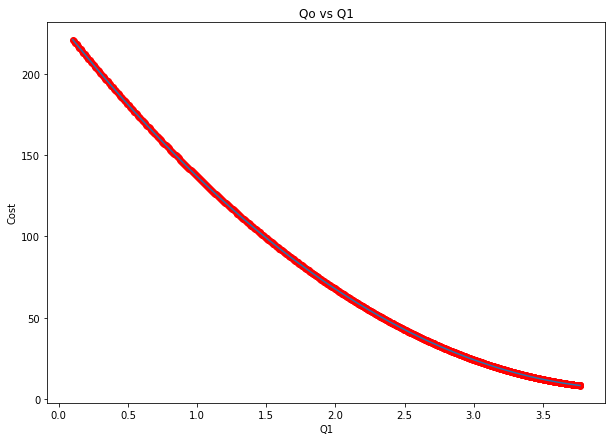

Optimal Q1 : 3.7697826975552915 
Optimal Qo : 1.2073951003350214


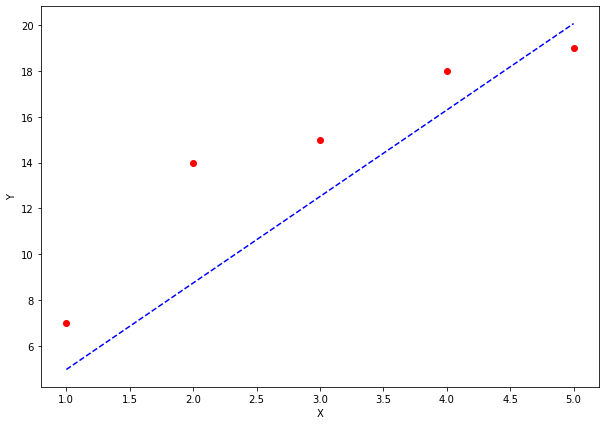

In [9]:
optimal_q1, optimal_q0 = gradientDescent(x, y)
print(f"Optimal Q1 : {optimal_q1} \nOptimal Qo : {optimal_q0}")

Y_pred = optimal_q1*x + optimal_q0

plt.figure(figsize = (10,7))
plt.scatter(x, y, marker='o', color='red')
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()